<a href="https://colab.research.google.com/github/jasleen1512/RL/blob/main/PCA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
breast = load_breast_cancer()

In [ ]:
breast_data = breast.data

In [ ]:
breast_data.shape

(569, 30)

In [ ]:
breast_labels = breast.target

In [ ]:
breast_labels.shape

(569,)

In [ ]:
import numpy as np
labels = np.reshape(breast_labels,(569,1))

In [ ]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [ ]:
final_breast_data.shape

(569, 31)

In [ ]:
import pandas as pd

In [ ]:
breast_dataset = pd.DataFrame(final_breast_data)

In [ ]:
breast_dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


In [ ]:
features = breast.feature_names

In [ ]:
features_labels = np.append(features,'label')

In [ ]:
breast_dataset.columns = features_labels

In [ ]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
breast_dataset['label'].replace(0, 'Benign',inplace=True) #no cancer
breast_dataset['label'].replace(1, 'Malignant',inplace=True) #positive to cancer

In [ ]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [ ]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.head(2)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [ ]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [ ]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [ ]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


In [ ]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

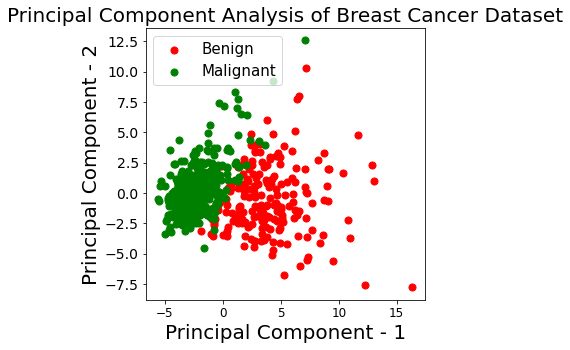

In [ ]:
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']




for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

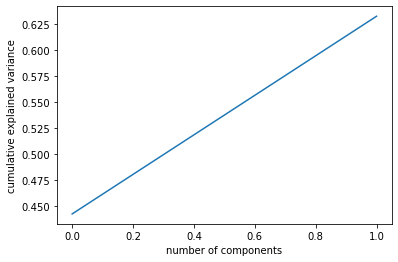

In [ ]:
pca = PCA().fit(normalised_breast)
plt.plot(np.cumsum(pca_breast.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

At least 9 components needed to explain 90.0% of the variance.


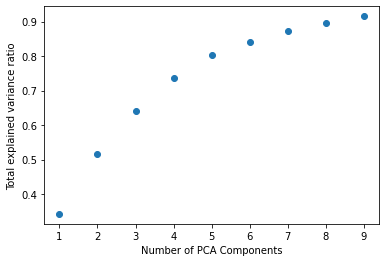

In [ ]:
def determineNComponents(normalised_breast, variance_threshold=0.90):    
    n_components = 0
    sum_explained_variance = 0
    sum_list = []
    while sum_explained_variance < variance_threshold:
        n_components += 1
        pca_breast = PCA(n_components=n_components)
        pca_breast.fit_transform(normalised_breast)
        sum_explained_variance = pca_breast.explained_variance_ratio_.sum()
        sum_list.append(sum_explained_variance)
    plt.scatter(np.arange(1,n_components+1,1),sum_list)
    plt.xlabel("Number of PCA Components")
    plt.ylabel("Total explained variance ratio")
    print("At least {} components needed to explain {}% of the variance.".format(n_components,variance_threshold*100))
    return n_components
min_components  = determineNComponents(normalised_breast.T)